In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./IPL.csv")
print(df.head())

   match_id           date                                         venue  \
0         1  March 26,2022                      Wankhede Stadium, Mumbai   
1         2  March 27,2022                     Brabourne Stadium, Mumbai   
2         3  March 27,2022            Dr DY Patil Sports Academy, Mumbai   
3         4  March 28,2022                      Wankhede Stadium, Mumbai   
4         5  March 29,2022  Maharashtra Cricket Association Stadium,Pune   

       team1      team2  stage toss_winner toss_decision  first_ings_score  \
0    Chennai    Kolkata  Group     Kolkata         Field               131   
1      Delhi     Mumbai  Group       Delhi         Field               177   
2   Banglore     Punjab  Group      Punjab         Field               205   
3    Gujarat    Lucknow  Group     Gujarat         Field               158   
4  Hyderabad  Rajasthan  Group   Hyderabad         Field               210   

   first_ings_wkts  second_ings_score  second_ings_wkts match_winner   won

### Basic information

In [3]:
print(df.info())
print("\n -------------------\n Shape of data \n", df.shape)
print(f"\n--------------------- \n all null values \n {df.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

/tmp/ipykernel_7950/565327694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=wins.index , y=wins.values,palette="viridis")


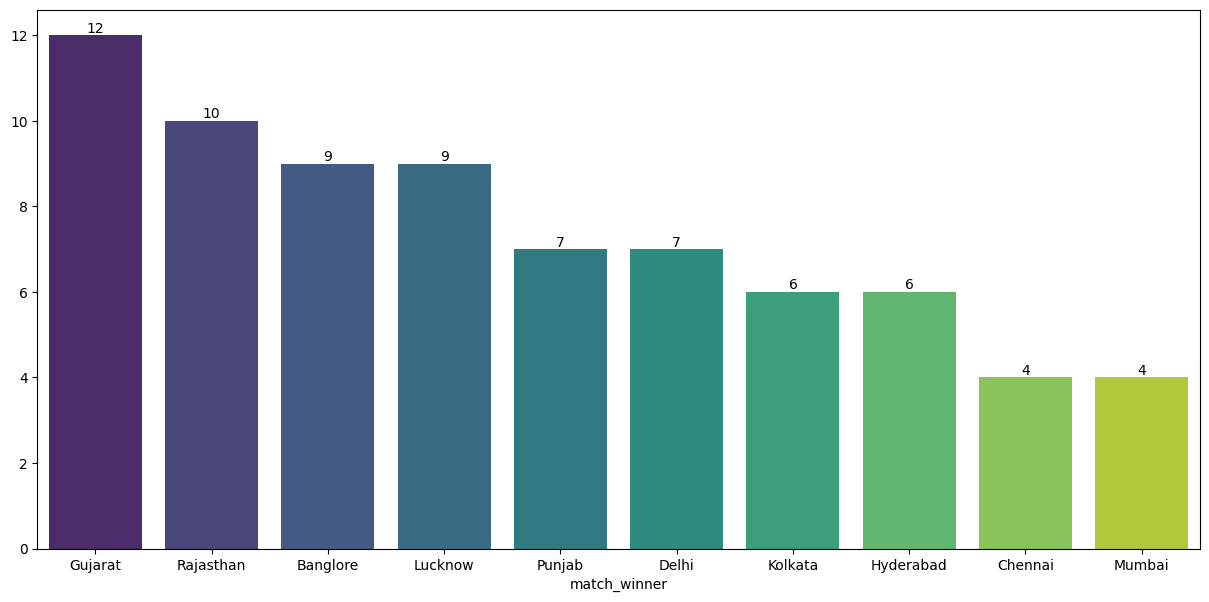

In [4]:
# which team win most matches
wins = df["match_winner"].value_counts()
plt.figure(figsize=(15,7))
ax = sns.barplot(x=wins.index , y=wins.values,palette="viridis")
for bar in ax.containers:
    ax.bar_label(bar)

Text(0.5, 1.0, 'Toss Decision')

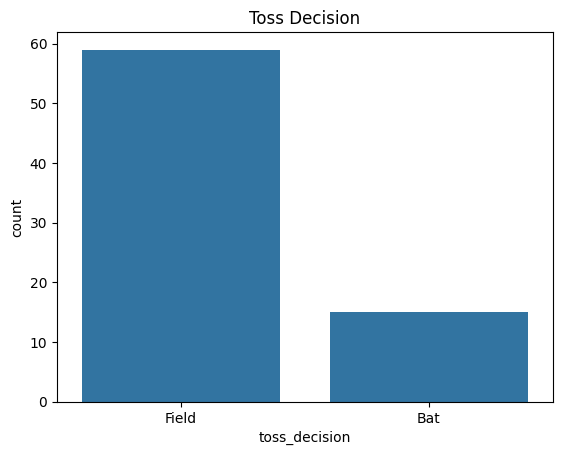

In [12]:
# toss decision
toss_decision = df["toss_decision"]
sns.countplot(x=toss_decision)
plt.title("Toss Decision")


In [21]:
# Toss winner vs Match winner
count = df[df["toss_winner"] == df["match_winner"]]["match_id"].count()
percentage = (count * 100)/ df["match_id"].count()
print(f"\n Toss winner won {count} matches out of {df['match_id'].count()} matches")


 Toss winner won 36 matches out of 74 matches


/tmp/ipykernel_7950/4177839504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=won_by, palette="viridis")


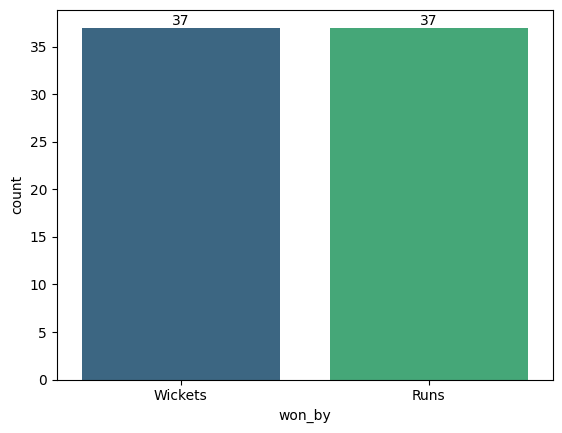

In [24]:
# How do teams win (by runs or wickets)
won_by = df["won_by"]
ax = sns.countplot(x=won_by, palette="viridis")

for bar in ax.containers:
    ax.bar_label(bar)

/tmp/ipykernel_7950/24057381.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=player_of_the_match.values, y=player_of_the_match.index, palette="mako")


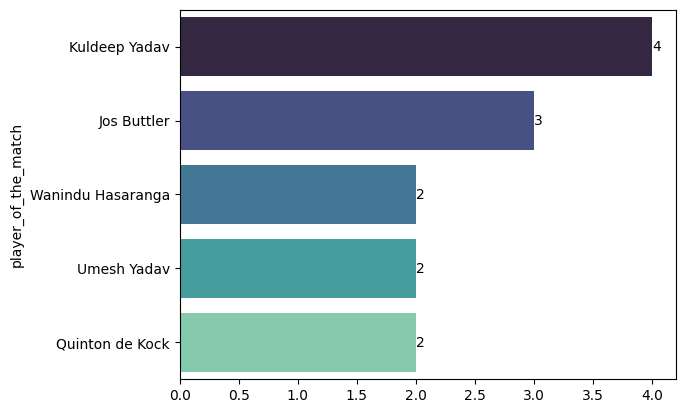

In [33]:
# most player of the match

player_of_the_match = df["player_of_the_match"].value_counts().head(5)
ax = sns.barplot(x=player_of_the_match.values, y=player_of_the_match.index, palette="mako")
for bar in ax.containers:
    ax.bar_label(bar)


/tmp/ipykernel_7950/3125864967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_scorer.index, y=top_scorer.values, palette="rocket")


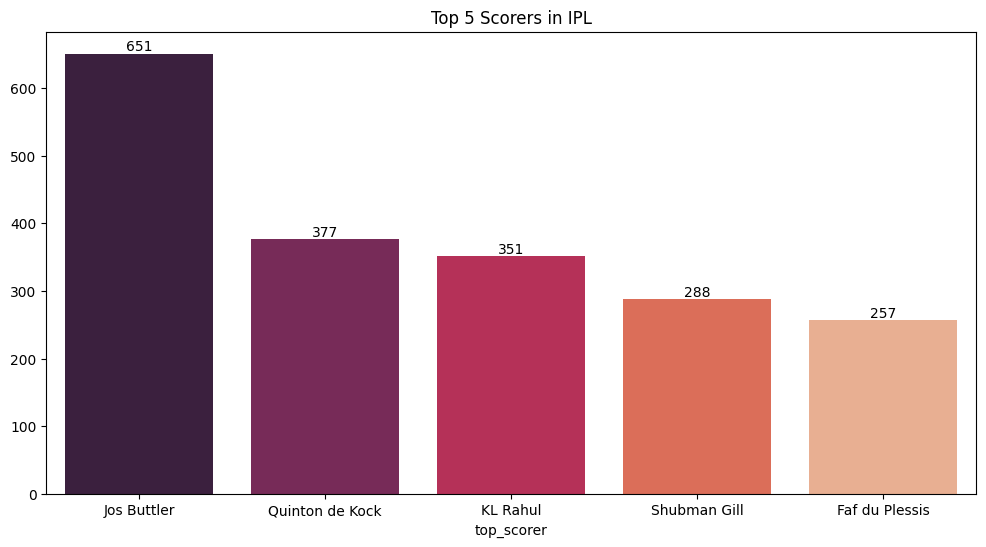

In [44]:
# 5 Top scorers
top_scorer = df.groupby("top_scorer")["highscore"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_scorer.index, y=top_scorer.values, palette="rocket")
plt.title("Top 5 Scorers in IPL")
for bar in ax.containers:
    ax.bar_label(bar)



/tmp/ipykernel_7950/1853717206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=best_bowling.index, y=best_bowling.values, palette="rocket")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Yuzvendra Chahal'),
  Text(1, 0, 'Jasprit Bumrah'),
  Text(2, 0, 'Kuldeep Yadav'),
  Text(3, 0, 'Rashid Khan'),
  Text(4, 0, 'Josh Hazlewood'),
  Text(5, 0, 'Kagiso Rabada'),
  Text(6, 0, 'Avesh Khan'),
  Text(7, 0, 'Umran Malik'),
  Text(8, 0, 'Wanindu Hasaranga'),
  Text(9, 0, 'T Natarajan')])

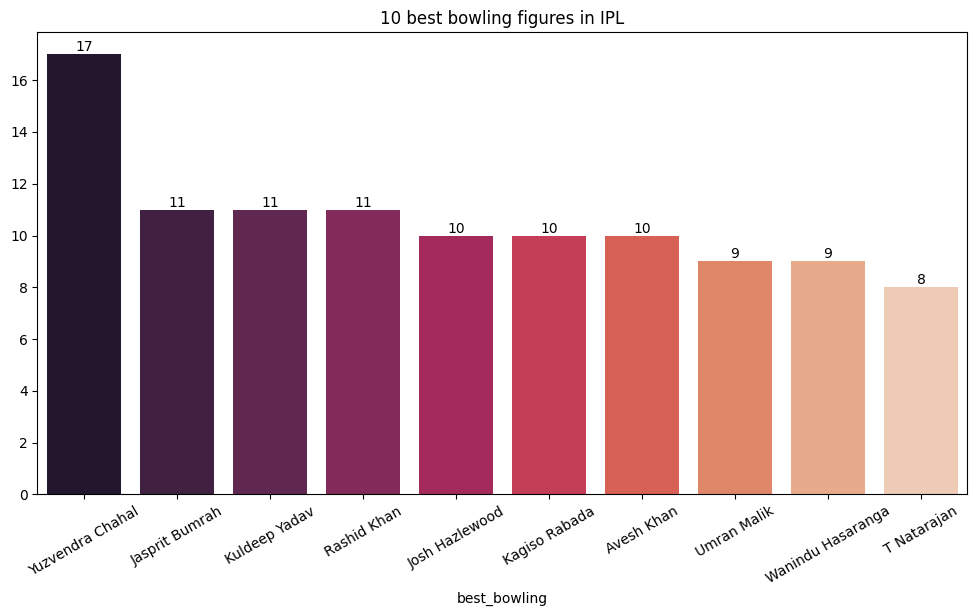

In [55]:
# 10 best bowling figures
df["highest_wickets"] = df["best_bowling_figure"].apply(lambda x: int(x.split("--")[0]))
best_bowling = df.groupby("best_bowling")["highest_wickets"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(x=best_bowling.index, y=best_bowling.values, palette="rocket")
plt.title("10 best bowling figures in IPL")
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=30)
